|Item|Description|
|:---|:---|
|Created |Jan 24, 2021|
|Author|BIMALKA PIYARUWAN|
|GitHub|https://github.com/bimalka98|

# Corner Detection

## Quantities to be evaluated over a window.

The function E(u,v) is minimum when the displacement is zero. Function is non zero for any ohter displacement.

### $E(u,v) = \Sigma{(I(x+u, y+v)-I(x,y))}^{2}$
### $E(u,v) = \Sigma{(I_{x}.u+I_{y}.v)^{2}}$
### $E(u,v) = \Sigma{(I_{x}^{2}.u^{2}+2.I_{x}.I_{y}.u.v + I_{y}^{2}.v^{2})}$

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [2]:
img0 = cv.imread('chess1.jpg', cv.IMREAD_GRAYSCALE)
img = cv.GaussianBlur(img0, (3, 3), 0)

In [3]:
#Gradient calculation using sobel or more accurate Scharr function 
Ix = cv.Scharr(img,cv.CV_64F,1,0)
Iy = cv.Scharr(img,cv.CV_64F,0,1)

#Taking sigma equals to convolve with a filter of ones
windim = 7
window = np.ones((windim,windim))

#Calculating second moment matrix's components over window for each pixel
sigma_Ixx = cv.filter2D(Ix*Ix,-1,window)
sigma_Iyy = cv.filter2D(Iy*Iy,-1,window)
sigma_Ixy = cv.filter2D(Ix*Iy,-1,window)

# Computing eigen values is expensive. Therefore calculate corner response function

## $R = det(M) - alpha* trace(M)^2$
### $det(M) = \Sigma(I_{x}^{2}).\Sigma(I_{y}^{2}) - (\Sigma(I_{x}.I_{y}))^{2} $   
### $trace(M) = \Sigma(I_{x}^{2})+ \Sigma(I_{y}^{2})$
## alpha = [0.04,0.06]

In [4]:
det_M = sigma_Ixx*sigma_Iyy - sigma_Ixy**2
trace_M = sigma_Ixx + sigma_Iyy
alpha = 0.045
CornerResponse = det_M - alpha*trace_M

In [5]:
# Thresholding
CornerResponse = CornerResponse/np.max(CornerResponse) # Normalizing the corner response to ease the thresholding
#print(np.min(CornerResponse), np.max(CornerResponse))
threshod = 0.9
cornerList = []
thrshldCorners = np.zeros(img.shape)
x_range, y_range = CornerResponse.shape
for x in range(x_range):
    for y in range(y_range):
        if CornerResponse[x][y] > threshod:
            thrshldCorners[x][y] = 1
            cornerList.append((x, y))

print(cornerList[0:10])            

[(47, 52), (47, 98), (47, 153), (47, 197), (47, 253), (47, 297), (47, 353), (53, 46), (53, 104), (53, 147)]


In [6]:
#Get the Ixx, Iyy, Ixy values over a window to plot the Error function surface.
for i in range(10):
    corner = cornerList[i]
    print(sigma_Ixx[corner[0]][corner[1]],sigma_Iyy[corner[0]][corner[1]],sigma_Ixy[corner[0]][corner[1]])

106192640.0 105165716.0 -13643046.0
105983042.0 105671174.0 13718014.0
106156693.0 105665549.0 -13715589.0
106171148.0 105688076.0 13603154.0
105983042.0 105671174.0 -13718014.0
105880014.0 105325606.0 13450292.0
106156693.0 105665549.0 -13715589.0
105464774.0 106031058.0 -13738002.0
105629039.0 105979035.0 13745757.0
105762569.0 105467617.0 -13577153.0


In [7]:
#Non-maximum suppression

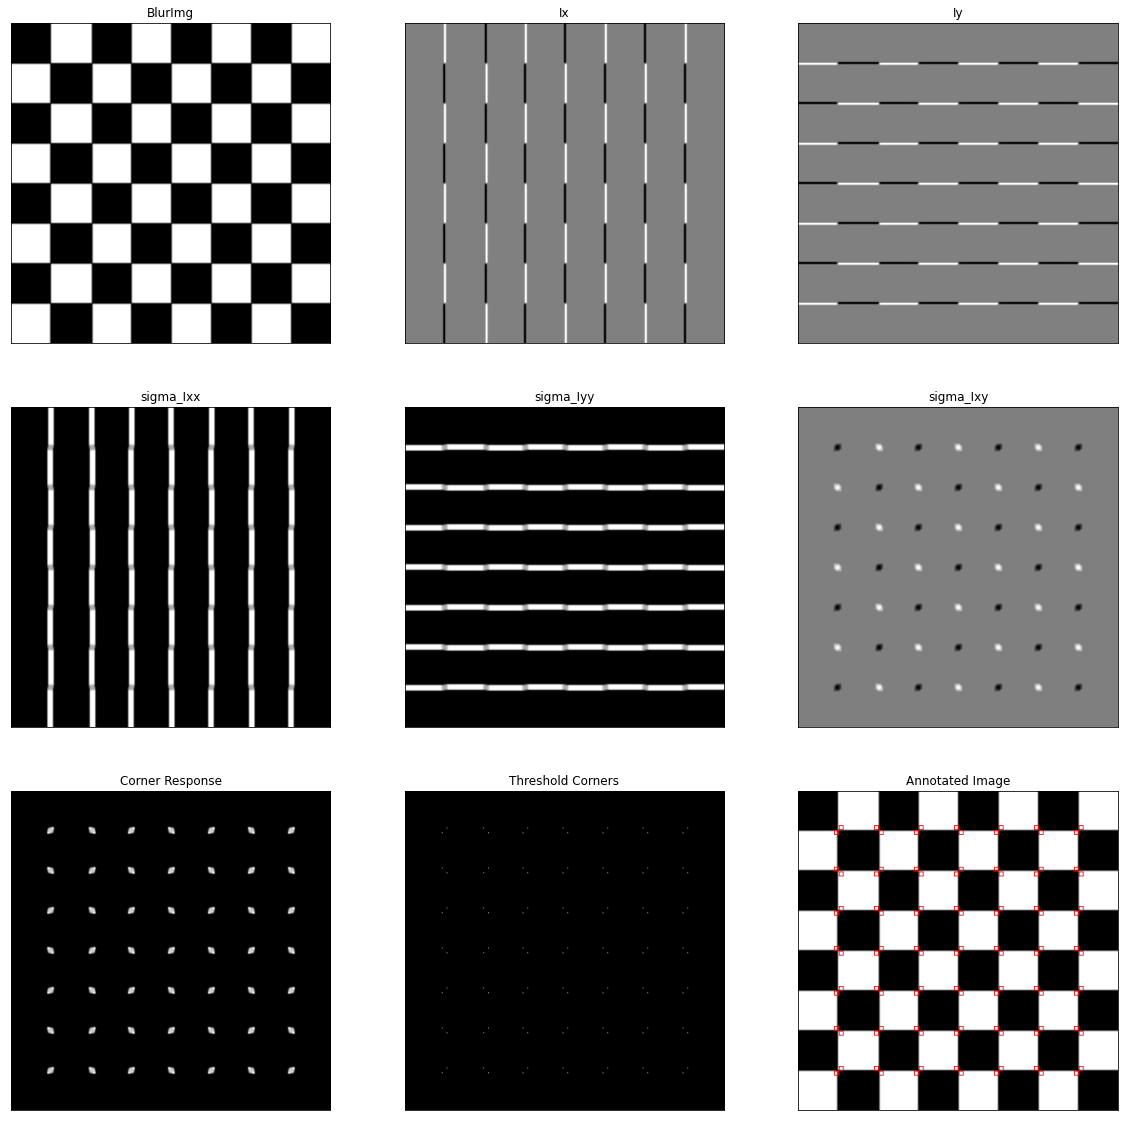

In [8]:
# Place rectangles at the corners
annotatedImg = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
offset = 2
for i in cornerList:
    x1 = i[0] - offset
    y1 = i[1] - offset 
    x2 = i[0] + offset + 1
    y2 = i[1] + offset + 1
    annotatedImg = cv.rectangle(annotatedImg, (x1,y1), (x2,y2), [255,0,0], 1)

# Plotting
fig, axes  = plt.subplots(3,3, sharex='all', sharey='all', figsize=(20,20))
img_dict = {'BlurImg':img, 'Ix':Ix, 'Iy':Iy,
            'sigma_Ixx':sigma_Ixx, 'sigma_Iyy':sigma_Iyy,'sigma_Ixy':sigma_Ixy,
            'Corner Response':CornerResponse, 'Threshold Corners':thrshldCorners,'Annotated Image':annotatedImg}
i =0
for key in img_dict.keys():
    plt.subplot(3,3,i+1),plt.imshow(img_dict[key], cmap='gray')#, vmin = 0, vmax = 255)
    plt.title(key),plt.xticks([]),plt.yticks([])
    i+=1
    
plt.show()
#plt.savefig('Corner Detection.eps')

In [9]:
#Ctrl + ] indent.
#Ctrl + [ dedent.
# Using built-in functions
#harrisCorner =	cv.cornerHarris(src, blockSize, ksize, k[, dst[, borderType]])
source_window = 'Source image'
corners_window = 'Corners detected'

img0 = cv.imread('chess1.jpg', cv.IMREAD_GRAYSCALE) # input 8-bit single channel
img = cv.GaussianBlur(img0, (3, 3), 0)
thresh = 230
# Detector parameters
blockSize = 7 # neighbourhood
apertureSize = 3 # for gradient operator
k = 0.045
# Detecting corners
dst = cv.cornerHarris(img, blockSize, apertureSize, k)
# Normalizing
dst_norm = np.empty(dst.shape, dtype=np.float32)
cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
dst_norm_scaled = cv.convertScaleAbs(dst_norm)
# Drawing a circle around corners
for i in range(dst_norm.shape[0]):
    for j in range(dst_norm.shape[1]):
        if int(dst_norm[i,j]) > thresh:
            cv.circle(dst_norm_scaled, (j,i), 5, (0), 2)
# Showing the result
cv.namedWindow(corners_window)
cv.imshow(corners_window, dst_norm_scaled)
cv.waitKey()
cv.destroyAllWindows()